In [1]:
import numpy as np
import pandas as pd
import os
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from time import time
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
import stemgraphic

In [2]:
path = 'train.csv'
path1 = 'unique_m.csv'
Dataset1 = pd.read_csv(path)
Dataset2 = pd.read_csv(path1).drop(['critical_temp', 'material'], axis = 1)

dataFrame = pd.concat([Dataset1, Dataset2], axis = 1)

In [3]:
# 删除一切相关联的特征,进行抽象
correlationMatrix = dataFrame.corr()
correlationFeatures = set()

for i in range(len(correlationMatrix)) :
    for j in range(i) :
        if abs(correlationMatrix.iloc[i, j]) > 0.8 :
            colname = correlationMatrix.columns[i]
            if colname != "critical_temp" :
                correlationFeatures.add(colname)
dataFrame.drop(correlationFeatures, axis = 1, inplace = True)
dataFrame.head(5)

,number_of_elements,mean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_entropy_fie,range_fie,wtd_range_fie,mean_atomic_radius,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,122.90607,31.794921,775.425,1010.268571,0.791488,810.6,735.985714,160.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,122.90607,36.161939,766.440,1010.612857,0.807078,810.6,743.164286,161.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,122.90607,35.741099,775.425,1010.820000,0.773620,810.6,743.164286,160.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,122.90607,33.768010,775.425,1010.544286,0.783207,810.6,739.575000,160.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,122.90607,27.848743,775.425,1009.717143,0.805230,810.6,728.807143,160.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [4]:
# 把方差低的特征剔除
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.1)
selector.fit(dataFrame)
dataFrame = pd.DataFrame(selector.transform(dataFrame), columns = dataFrame.columns[selector.get_support()])
dataFrame.shape

(21263, 68)

In [5]:
dataFrame.to_csv('CleanData2.csv')

In [6]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

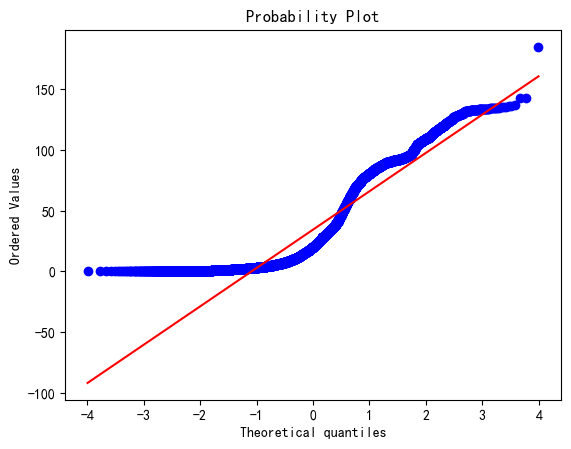

In [8]:
df = pd.read_csv('CleanData2.csv').drop('Unnamed: 0',axis=1)
y = df['critical_temp']
stats.probplot(y, dist="norm", plot=plt)
plt.show()

(<Figure size 750x425 with 1 Axes>, <Axes:>)

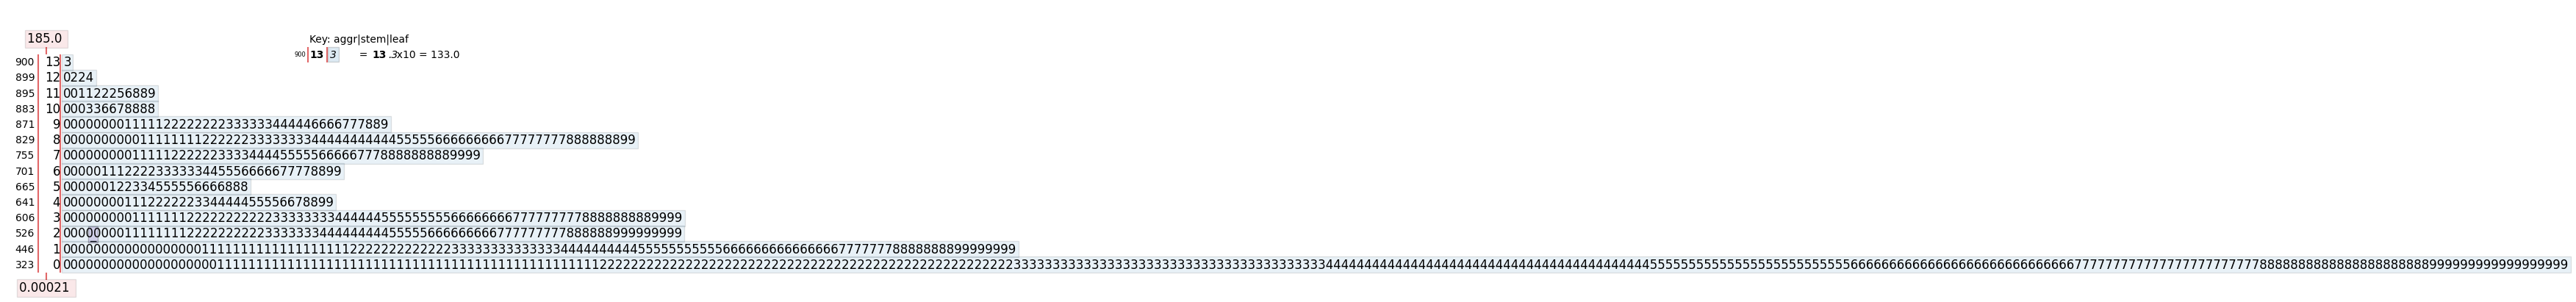

In [3]:
import stemgraphic
df = pd.read_csv('CleanData2.csv').drop('Unnamed: 0',axis=1)
y = df['critical_temp']
stemgraphic.stem_graphic(y, scale=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x19fa5254448>,
 'caps': [<matplotlib.lines.Line2D at 0x19fa5254d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fa5d78f08>],
 'medians': [<matplotlib.lines.Line2D at 0x19fa525f348>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fa525af48>],
 'means': []}

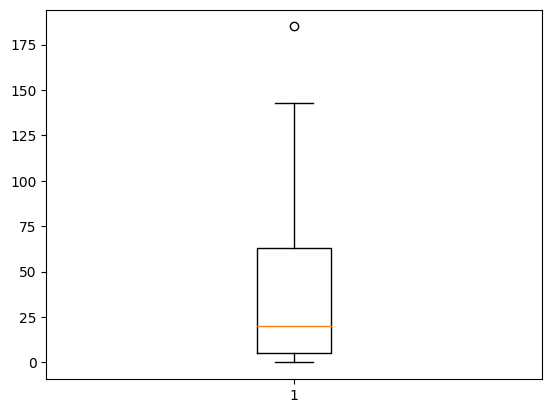

In [4]:
df = pd.read_csv('CleanData2.csv').drop('Unnamed: 0',axis=1)
y = df['critical_temp']
plt.boxplot(y)

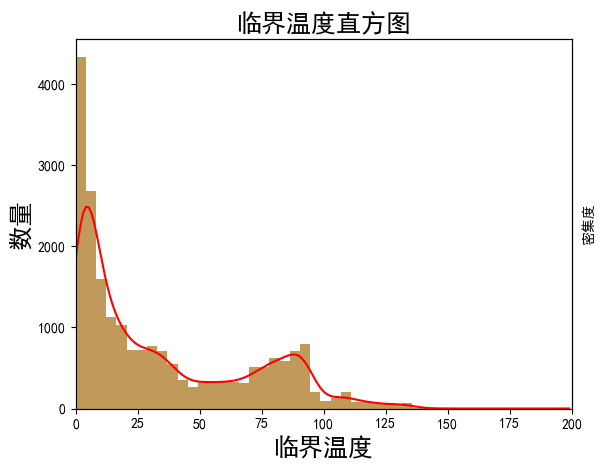

In [86]:
df = pd.read_csv('CleanData2.csv').drop('Unnamed: 0',axis=1)
y = df['critical_temp']
e = 0.21
y_mean = y.apply(lambda x: (x**e)).mean()
# plt.figure(figsize=(15,6))
# plt.subplot(1,2,1)

# plt.title('Histogram of critical temperature',fontsize=18)
plt.title('临界温度直方图',fontsize=18)
ax1 = sns.distplot(y, kde=False, color = '#00ff00')
# Creating another Y axis
second_ax1 = ax1.twinx()
#Plotting kde without hist on the second Y axis
sns.distplot(y, ax=second_ax1, kde=True, hist=True, color = '#ff0000')
#Removing Y ticks from the second axis
second_ax1.set_yticks([])

# ax1.set_ylabel('count',fontsize=18)
ax1.set_ylabel('数量',fontsize=18)
second_ax1.set_ylabel('密集度')
# ax1.set_xlabel('Critical Temperature (Kelvin)',fontsize=18)
ax1.set_xlabel('临界温度',fontsize=18)
plt.xlim(0,200)
plt.savefig('临界温度直方图.jpg', dpi = 500, bbox_inches = 'tight')

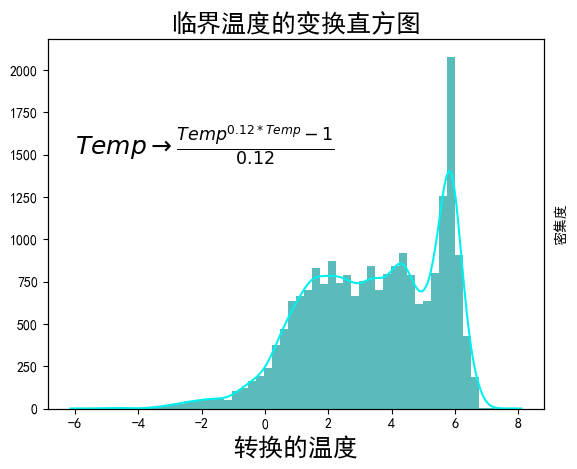

In [85]:
# plt.title('Transformed histogram \n of critical temperature',fontsize=18)

plt.title('临界温度的变换直方图',fontsize=18)


transform_text = r'$Temp\rightarrow \frac{Temp^{0.12*Temp}-1}{0.12}$'
transformed = y.apply(lambda x: (x ** 0.12 - 1) / 0.12)
ax2 = sns.distplot(transformed, kde=False, color = "#000000")
# Creating another Y axis
second_ax2 = ax2.twinx()
#Plotting kde without hist on the second Y axis
sns.distplot(transformed, ax=second_ax2, kde=True, hist=True,color="#00f0f0")
#Removing Y ticks from the second axis
second_ax2.set_yticks([])
ax2.text(-6,1500,transform_text,fontsize=18)

# ax2.set_xlabel('Transformed Temp',fontsize=18)
ax2.set_xlabel('转换的温度',fontsize=18)
second_ax2.set_ylabel('密集度')
plt.subplots_adjust(wspace=0.2)
plt.savefig('临界温度的变换直方图.jpg', dpi = 500, bbox_inches = 'tight')

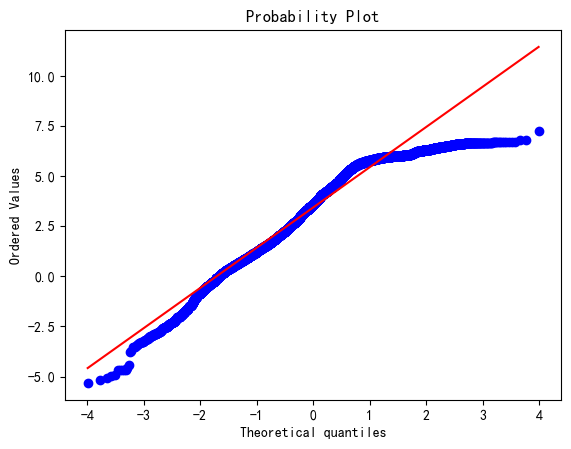

In [14]:
transformed = y.apply(lambda x: (x ** 0.12 - 1) / 0.12)
stats.probplot(transformed, dist="norm", plot=plt)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

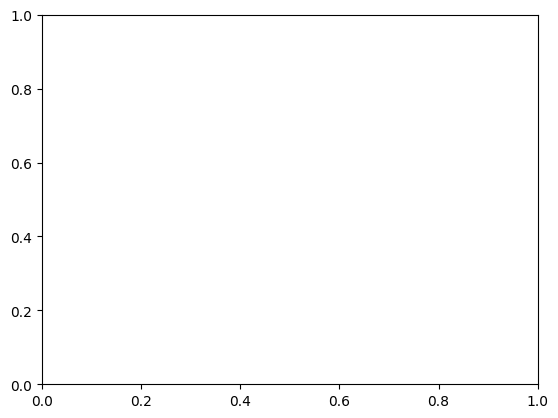

In [6]:
transformed = y.apply(lambda x: (x ** 0.12 - 1) / 0.12)
plt.boxplot(transformed)